# HW 5 - Titanic 

In this HW, we would like to better understand what features of the passengers are helpful for predicting whether they survived or not. Whether the passanger survived (1) or not (0) is given in the Survived column. 

In [9]:
#Put your imports here
import pandas as pd
import pandasql as pdsql
import matplotlib
from matplotlib import pyplot as plt
matplotlib.figure.Figure(figsize =(20,30))
plt.style.use('ggplot')
%matplotlib inline

First read in the dataframe into a variable called df_titanic. Use the head method to check that you have read everything correctly.

In [10]:
df_titanic = pd.read_csv("Titanic.csv")
df_titanic.index += 1
df_titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [3]:
pysqldf = lambda q: pdsql.sqldf(q, globals())

**Question 1 (SQL + Plotting):** Write 4 separate queries to create the following 4 dataframe, which should each have an Age and Fare columns (We won't use the Fare column , but this is just for practice):

- Mr_survived : Have a title of Mr. and they survived.
- Mr_died: Have title of Mr. and they died.
- Mrs_survived : Have a title of Mrs. and they survived.
- Mrs_died: Have title of Mrs. and they died.



In [4]:
#Write your code
query1 = "SELECT Age, Fare, Name FROM df_titanic WHERE Name LIKE '%Mr.%' AND Survived = 1;"
df_query1 = pysqldf(query1)

query2 = "SELECt Age, Fare, Name FROM df_titanic WHERE Name LIKE '%Mr.%' AND Survived = 0;"
df_query2 = pysqldf(query2)

query3 = "SELECT Age, Fare, Name FROM df_titanic WHERE Name LIKE '%Mrs.%' AND Survived = 1;"
df_query3 = pysqldf(query3)

query4 = "SELECT Age, Fare, Name FROM df_titanic WHERE Name LIKE '%Mrs.%' AND Survived = 0;"
df_query4 = pysqldf(query4)

Each of these dataframes has Ages missing. For each data frame, fill in the missing Ages with the average age of the other passengers in that dataframe. 

In [5]:
#Write your code here
df_query1.Age = df_query1.Age.fillna(df_query1.Age.mean())
df_query2.Age = df_query2.Age.fillna(df_query2.Age.mean())
df_query3.Age = df_query3.Age.fillna(df_query3.Age.mean())
df_query4.Age = df_query4.Age.fillna(df_query4.Age.mean())

Now, produce the following histograms, which shows the distribution of ages of Mr./Mrs. who survived/dies. I set figsize = (12,6) and you may find the alpha input to the plot() method useful for getting the transparent nature of the plots below.

 <img src="First_Plot.png">

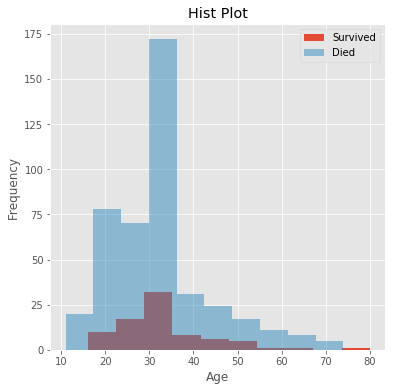

In [35]:
#Write your code here to produce the plots
plt.figure(figsize = (6,6))
plt.hist(df_query1.Age, bins = 10, alpha=1, label='Survived')
plt.hist(df_query2.Age, bins = 10, alpha=0.5, label='Died')
plt.legend(loc='upper right')
plt.title("Hist Plot")
plt.xlabel("Age")
plt.ylabel("Frequency")

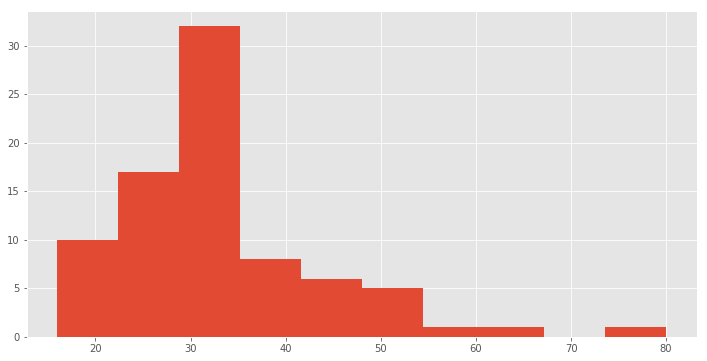

In [8]:
plt.figure(figsize = (6,6))
plt.hist(df_query1.Age, bins = 10, alpha=1, label='Survived')
plt.hist(df_query2.Age, bins = 10, alpha=0.5, label='Died')
plt.legend(loc='upper right')
plt.title("Hist Plot")
plt.xlabel("Age")
plt.ylabel("Frequency")

**Question 2 (SQL):** Write a single query which finds the fraction of first class (Pclass = 1) female passengers who survived. 

In [60]:
query5 = "SELECT * FROM df_titanic WHERE Sex = 'female' AND Survived = 1 AND Pclass = 1;"
df_query5 = pysqldf(query5)
df_query5.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
3,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
4,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


**Question 3 (SQL)**:  Write a single query which finds the max fare paid from passengers who embarked from each port.

In [68]:
query6 = "SELECT Embarked, MAX(Fare) 'Max Fare' FROM df_titanic WHERE Embarked IS NOT NULL GROUP BY Embarked;"
df_query6 = pysqldf(query6)
df_query6.head()

,Embarked,Max Fare
0,C,512.3292
1,Q,90.0000
2,S,263.0000


**Question 4 (SQL)**:  Update the previous query to find the max fare paid from passengers who embarked from each port at each class (Pclass).

In [70]:
query7 = "SELECT Embarked, Pclass, MAX(Fare) 'Max Fare' FROM df_titanic GROUP BY Embarked, Pclass;"
df_query7 = pysqldf(query7)
df_query7

,Embarked,Pclass,Max Fare
0,None,1,80.0000
1,C,1,512.3292
2,C,2,41.5792
3,C,3,22.3583
4,Q,1,90.0000
5,Q,2,12.3500
6,Q,3,29.1250
7,S,1,263.0000
8,S,2,73.5000
9,S,3,69.5500


**Question 5 (SQL):**  Write a single query to find the combined survival percentage of males over >=50 and women over >=40. Hint: Use CASE.

In [20]:
query8_sub = "SELECT COUNT(*) FROM df_titanic WHERE Age > (CASE Sex WHEN 'male' THEN 50.0 WHEN 'female' THEN 40.0 END)"
query8 = "SELECT COUNT(*)*100.0/(" + query8_sub + ") AS Percent FROM df_titanic " \
         + "WHERE Age > (CASE Sex WHEN 'male' THEN 50.0 WHEN 'female' THEN 40.0 END) AND Survived = 1;"
df_query8 = pysqldf(query8)
df_query8.head()

,Percent
0,44.680851


In [18]:
pysqldf("SELECT COUNT(*) FROM df_titanic WHERE Age > (CASE Sex WHEN 'male' THEN 50.0 WHEN 'female' THEN 40.0 END) AND Survived='1'")/pysqldf("SELECT COUNT(*) FROM df_titanic WHERE Age > (CASE Sex WHEN 'male' THEN 50.0 WHEN 'female' THEN 40.0 END)") 

,COUNT(*)
0,0.446809
